# Clasificadores discriminantes lineales

El aprendizaje de máquina se fundamenta en el reconocimiento de patrones y la minería de datos. A su vez, estos nacen a partir de la ciencia de datos, que comprende herramientas provenientes de la estadística, el cálculo, el álgebra lineal y otras ciencias puras. 

Las máquinas, igual que los seres humanos, aprenden a partir de ejemplos. El proceso de aprendizaje se denomina "entrenamiento" y requiere entonces de un conjunto de datos de entrenamiento que la máquina pueda usar para aprender. El aprendizaje consiste en encontrar patrones que puedan ser extrapolables a otros casos que no necesariamente hayan estado en la etapa de entrenamiento.  

¿Cómo diferenciar limones, naranjas y manzanas?
https://homepages.inf.ed.ac.uk/imurray2/teaching/oranges_and_lemons/

Los datos pueden descargarse de aquí:
https://homepages.inf.ed.ac.uk/imurray2/teaching/oranges_and_lemons/fruit_data

Y la descripción de a qué corresponde cada muestra está aquí:
https://homepages.inf.ed.ac.uk/imurray2/teaching/oranges_and_lemons/fruit_types.txt

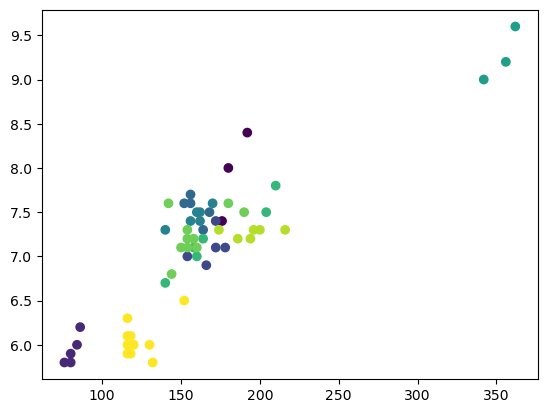

[ 1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.
  5.  5.  5.  5.  5.  5.  6.  6.  6.  7.  7.  7.  7.  7.  7.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dataset = np.genfromtxt('/media/jorge/Datos/Docencia/UCaldas/Sistemas Inteligentes II/lnm.txt')
muestras = dataset[:,1:3] #Tomamos dos características
clase = dataset[:,0]
plt.scatter(muestras[:,0],muestras[:,1],c=clase)
plt.show()
print(clase)

El paquete SciKit Learn contiene una cantidad de conjuntos de datos y herramientas útiles para el aprendizaje de máquina.

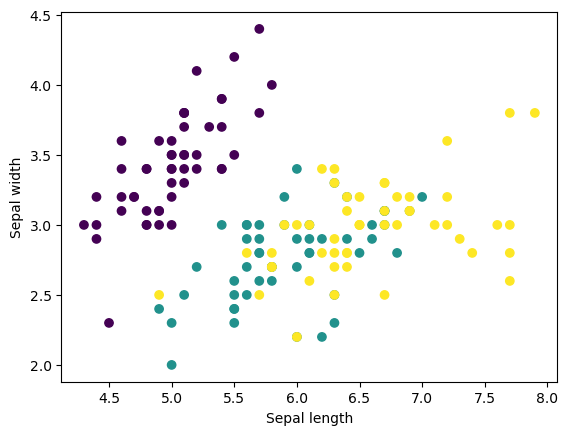

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
# Importamos la base de datos iris
iris = datasets.load_iris()
#print(iris.data)
X = iris.data[:,0:2]  # Tomamos las dos primeras características (150 muestras, 2 características)
y = iris.target #Etiquetas
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
print(y) #Éste es el vector de etiquetas

In [ ]:
¿Cómo encontrar una frontera que separe correctamente los datos?
Consideremos solamente dos clases: Setosa y versicolor

(100, 2)


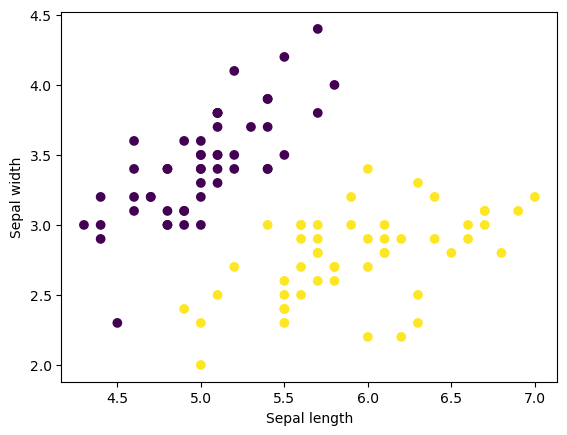

In [9]:
X = iris.data[0:100, 0:2]  # Tomamos las dos primeras características, las primeras 100 muestras
y = iris.target[0:100] #Tomamos las primeras 100 etiquetas
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
print(np.shape(X))

Un clasificador discriminativo se enfoca en encontrar una frontera de decisión que separe correctamente los datos. Una linea recta en dos dimensiones está dada por:

\begin{equation}
w_1 x_1 + w_2 x_2 + w_0 = 0
\end{equation}

\begin{equation}
x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2} 
\end{equation}

\begin{equation}
y=mx+b
\end{equation}

O en notación vectorial:

\begin{equation}
[w_1 w_2 w_0] \left[
\begin{array}{c}
x_1\\
x_2\\
1
\end{array}
\right]
\end{equation}

\begin{equation}
\boldsymbol{w}^T \boldsymbol{x} = 0
\end{equation}

Esta ecuación se llama "función discriminante lineal". $\boldsymbol{w}$ representa un vector normal a la frontera de decisión y $\boldsymbol{x}$ es cada una de las muestras en la base de datos. El conjunto total lo denominaremos $\boldsymbol{X}$ y es una matriz donde cada fila es una muestra y cada columna es una característica.

Lo más importante de la función discriminante lineal es que nos permite realizar predicciones. Recordemos un poco de álgebra lineal:

\begin{equation}
\boldsymbol{w}^T \boldsymbol{x} = \|\boldsymbol{x}\| \|\boldsymbol{w}\| \cos(\theta)
\end{equation}

<div>
<img src="feature_space.png" width="400"/>
</div>

Podemos ver que para todas las muestras que estén sobre la frontera de decisión, el ángulo $\theta$ será menor a 90°, mientras que para las que estén por debajo de la frontera, estará entre 90° y 180°. Ahora analicemos la función coseno:

<div>
<img src="cosine.png" width="300"/>
</div>

¡Las muestras que estén sobre la frontera de decisión tendrán valores positivos y las que estén por debajo tendrán valores negativos!

¿Qué significa encontrar una frontera que separe "correctamente" los datos? Definamos una medida de el error que comete la función discriminante lineal usando mínimos cuadrados:

\begin{equation}
\varepsilon = \frac{1}{2}\sum_{i=1}^n (\boldsymbol{w}^T \boldsymbol{x}_i - y_i)^2
\end{equation}

Si queremos minimizar el error, derivamos y despejamos $\boldsymbol{w}$. Esto nos lleva a:

\begin{equation}
\boldsymbol{w} = \left( \boldsymbol{X}^T \boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}
\end{equation}


In [ ]:
# Entrenamiento del clasificador
y=np.where(y==0,-1,y) # Reemplazamos los 0's por -1's 
Xm=np.hstack((X,np.ones((100,1)))) # Agregamos unos en la última columna de X
XTX = np.transpose(Xm).dot(Xm)
XTXi = np.linalg.inv(XTX)
wm=((XTXi).dot(np.transpose(Xm))).dot(y)
print(wm)

[ 0.95854437 -1.18540551 -1.57062456]


Aquí finaliza el entrenamiento. La máquina ha aprendido cómo diferenciar entre una iris del tipo setosa y una iris del tipo virginica. ¿Cómo se usa este conocimiento adquirido?

\begin{equation}
\boldsymbol{w}\boldsymbol{x}^T = \left\{ \begin{array}{l}
>0, virginica\\
<0, setosa
\end{array}\right.
\end{equation}

In [ ]:
# test=np.array([[6.5, 3.5, 1]])
test=Xm
prediccion=np.sign(wm.dot(np.transpose(test)))

# print(prediccion)
print(Xm[41,])

[4.5 2.3 1. ]


¿Y cómo se hace en sklearn?

In [ ]:
from sklearn import linear_model
clf = linear_model.RidgeClassifier(alpha=0)
clf.fit(X[0:100,:2], y[0:100]) #Entrenamiento
test=np.array([[6.5,3.92]]) #Prueba
clf.predict(test)